<a href="https://colab.research.google.com/github/nehaa56789/Quantum-kmeans-clustering/blob/main/classical_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# ============================================
# 🌿 Classical K-Means Crop Recommendation
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.utils import resample

In [72]:
# Step 1: Load Dataset
url = "/content/Crop_recommendation.csv"
df = pd.read_csv(url)

In [75]:
# Step 2: Feature Selection
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[features].values

In [76]:
# Step 3: Handle Missing Values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [77]:
# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [78]:
# Step 5: L2 Normalization
X_normalized = normalize(X_scaled, norm='l2')

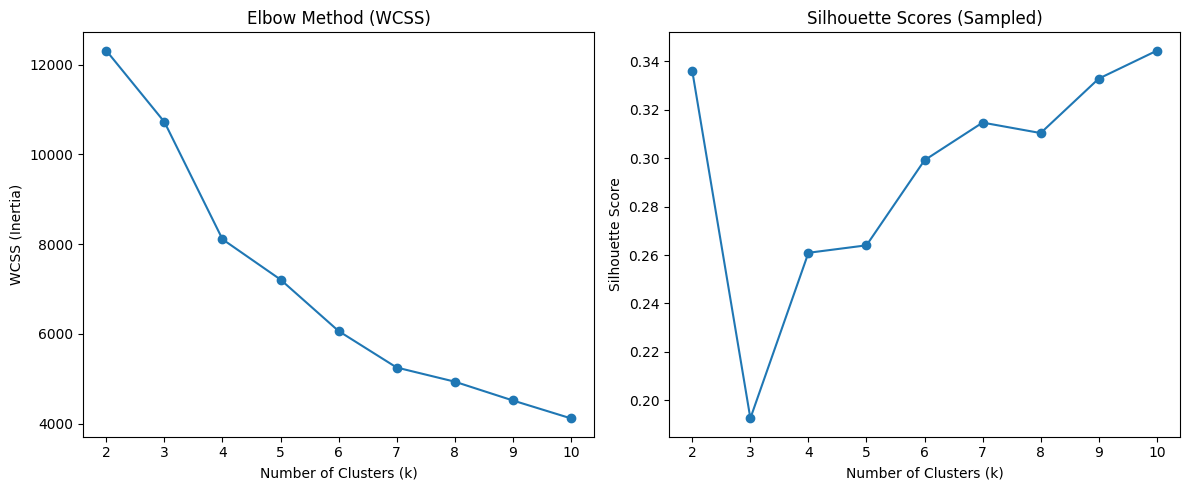

Best k based on silhouette score: 10


In [79]:
# --- Select numeric features (drop 'label') ---
X = df.drop(columns=['label'])

# --- Scale the features (important for K-Means) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Prepare sampling for silhouette score ---
X_sampled = resample(X_scaled, n_samples=500, random_state=42)

# --- Elbow and Silhouette calculations ---
k_values = range(2, 11)
wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_full = kmeans.fit_predict(X_scaled)

    # Elbow method uses full data
    wcss.append(kmeans.inertia_)

    # Silhouette score uses sampled data
    labels_sampled = kmeans.predict(X_sampled)
    silhouette_scores.append(silhouette_score(X_sampled, labels_sampled))

# --- Plot results ---
plt.figure(figsize=(12, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores (Sampled)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

print(f"Best k based on silhouette score: {k_values[np.argmax(silhouette_scores)]}")

In [80]:
# Step 6: Classical K-Means Clustering
k = 7  # choose number of clusters (can be tuned)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_normalized)

In [81]:
# Step 7: Add cluster labels back to the dataframe
df['Cluster'] = clusters

In [82]:
# Step 8: Evaluate clustering quality
sil_score = silhouette_score(X_normalized, clusters)
print(f"✅ Silhouette Score (Classical): {sil_score:.4f}")

✅ Silhouette Score (Classical): 0.3489


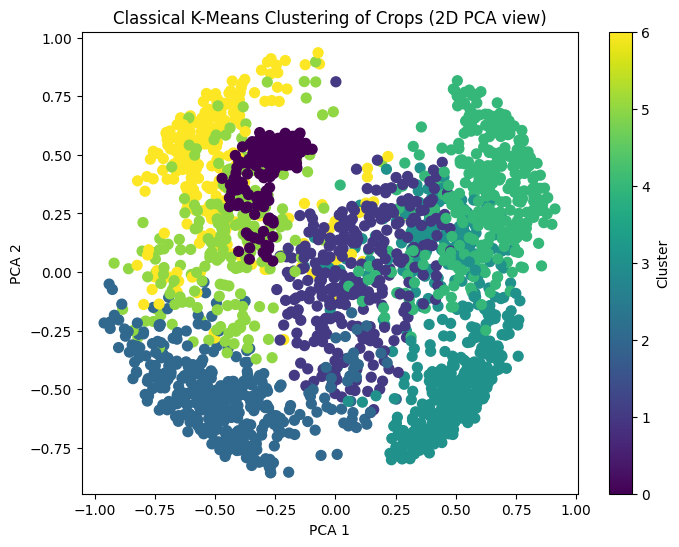

In [83]:
# Step 9: Visualize clusters (2D PCA projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50)
plt.title("Classical K-Means Clustering of Crops (2D PCA view)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

In [84]:
# Step 10: Example cluster preview
print("\n📊 Sample Clustered Data:")
print(df[['N','P','K','temperature','humidity','ph','rainfall','label','Cluster']].head(10))


📊 Sample Clustered Data:
    N   P   K  temperature   humidity        ph    rainfall label  Cluster
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice        4
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice        4
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice        4
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice        4
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice        4
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice        4
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice        4
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice        4
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice        4
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice        4


In [85]:


# Assuming:
# X_normalized = preprocessed dataset
# clusters = labels predicted by classical KMeans

sil_classical = silhouette_score(X_normalized, clusters)
db_classical = davies_bouldin_score(X_normalized, clusters)

print("📊 Classical Model Metrics")
print(f"✅ Silhouette Score: {sil_classical:.4f}")
print(f"✅ Davies–Bouldin Index: {db_classical:.4f}")


📊 Classical Model Metrics
✅ Silhouette Score: 0.3489
✅ Davies–Bouldin Index: 1.1213


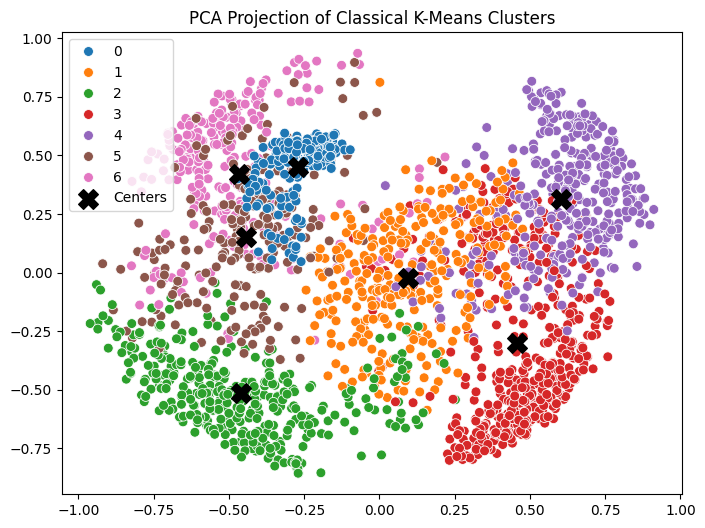

In [91]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='tab10', s=50)
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:,0], centers_pca[:,1], c='black', s=200, marker='X', label='Centers')
plt.title("PCA Projection of Classical K-Means Clusters")
plt.legend()
plt.show()


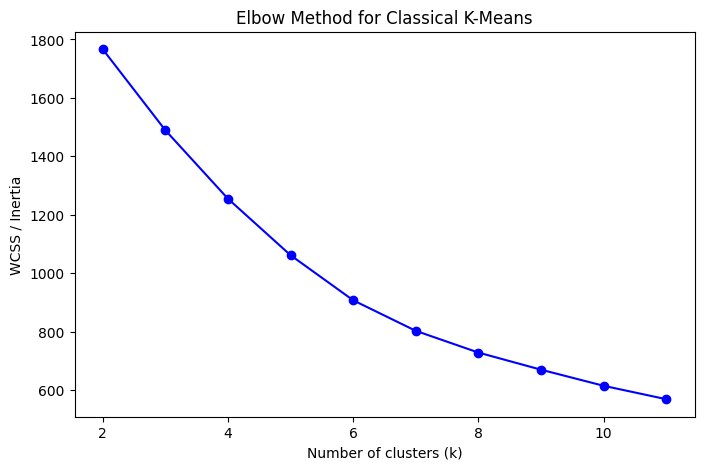

In [92]:
wcss = []
K_range = range(2, 12)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_normalized)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.title('Elbow Method for Classical K-Means')
plt.show()


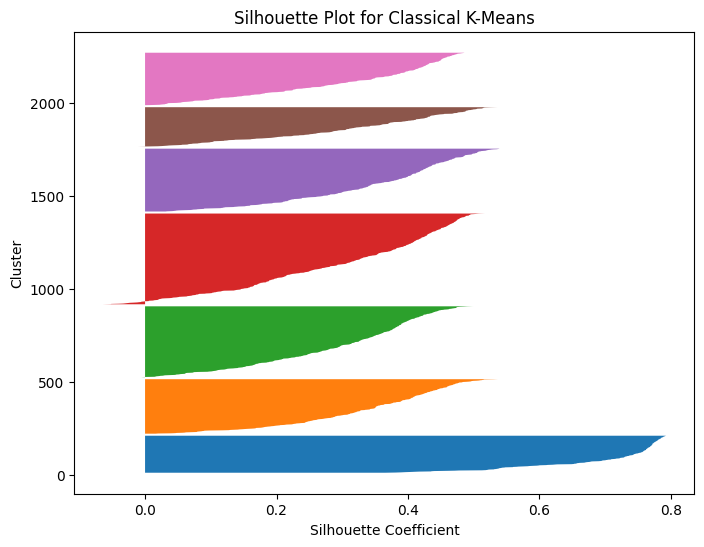

In [93]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

sil_samples = silhouette_samples(X_normalized, df['Cluster'])
y_lower = 10
plt.figure(figsize=(8,6))

for i in range(k):
    ith_cluster_silhouette = sil_samples[df['Cluster'] == i]
    ith_cluster_silhouette.sort()
    plt.fill_betweenx(np.arange(y_lower, y_lower + len(ith_cluster_silhouette)),
                      0, ith_cluster_silhouette)
    y_lower += len(ith_cluster_silhouette) + 10

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot for Classical K-Means")
plt.show()


Davies-Bouldin Index: 1.1213
Calinski-Harabasz Index: 627.0114


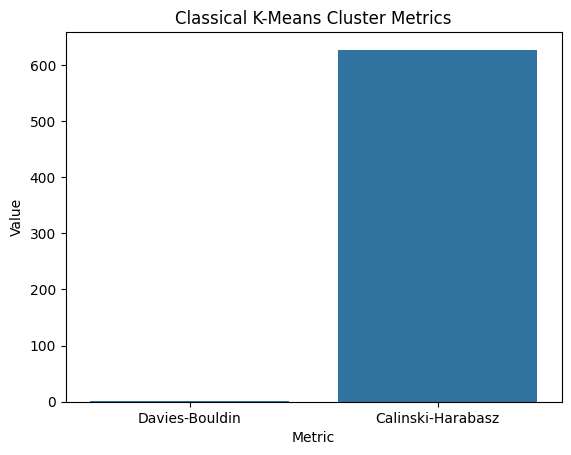

In [94]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

dbi = davies_bouldin_score(X_normalized, df['Cluster'])
chi = calinski_harabasz_score(X_normalized, df['Cluster'])
print(f"Davies-Bouldin Index: {dbi:.4f}")
print(f"Calinski-Harabasz Index: {chi:.4f}")

# Optional bar chart
import pandas as pd
metrics_df = pd.DataFrame({'Metric': ['Davies-Bouldin', 'Calinski-Harabasz'],
                           'Value': [dbi, chi]})
sns.barplot(x='Metric', y='Value', data=metrics_df)
plt.title('Classical K-Means Cluster Metrics')
plt.show()


/tmp/ipython-input-2324036763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')


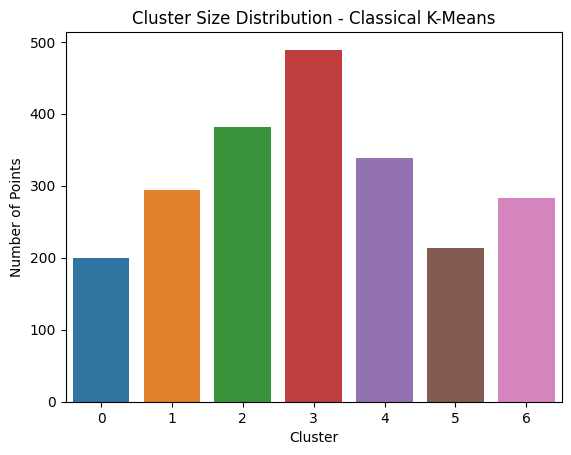

In [95]:
cluster_counts = df['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Cluster Size Distribution - Classical K-Means')
plt.show()
